In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [453]:
df = pd.read_csv(r'C:\Users\admin\Desktop\diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [454]:
df.shape

(101766, 50)

In [455]:
print('Number of Features = {}\n\nName of Features = {}'.format(len(df.columns), df.columns))

Number of Features = 50

Name of Features = Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [456]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [458]:
df['readmitted'].value_counts(normalize=True)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

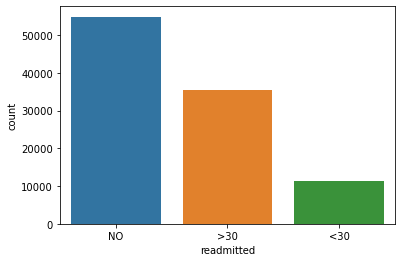

In [459]:
sns.countplot(df['readmitted'])

In [460]:
df['readmitted'] = np.where(df['readmitted']=='<30',1,0)

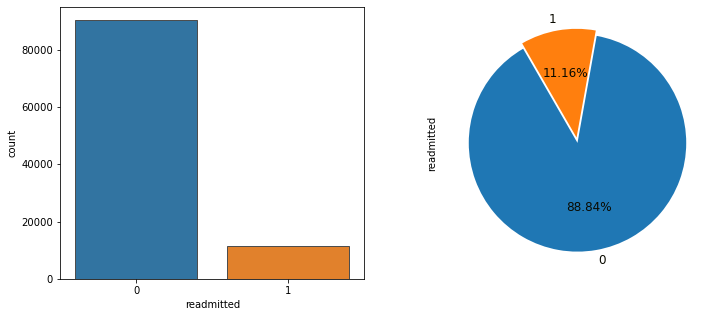

In [461]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=df.readmitted, data=df ,ax=ax[0], edgecolor=".3")
df.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [462]:
df['readmitted'].value_counts(normalize=True)*100

0    88.840084
1    11.159916
Name: readmitted, dtype: float64

In [463]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [464]:
df.replace('?', np.nan, inplace=True)

In [465]:
df.isnull().mean()[df.isnull().mean()!=0]*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

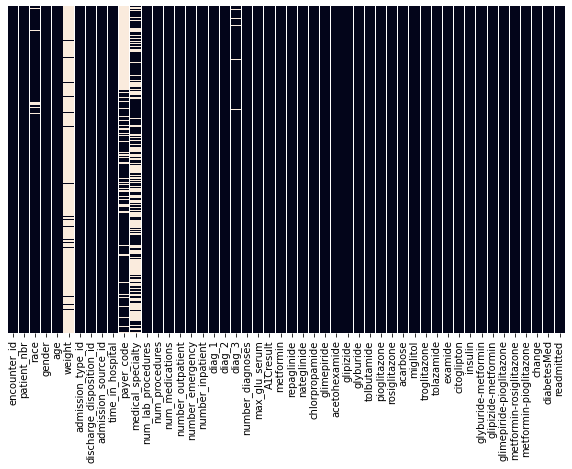

In [466]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [467]:
df.isnull().mean()[df.isnull().mean()!=0]

race                 0.022336
weight               0.968585
payer_code           0.395574
medical_specialty    0.490822
diag_1               0.000206
diag_2               0.003518
diag_3               0.013983
dtype: float64

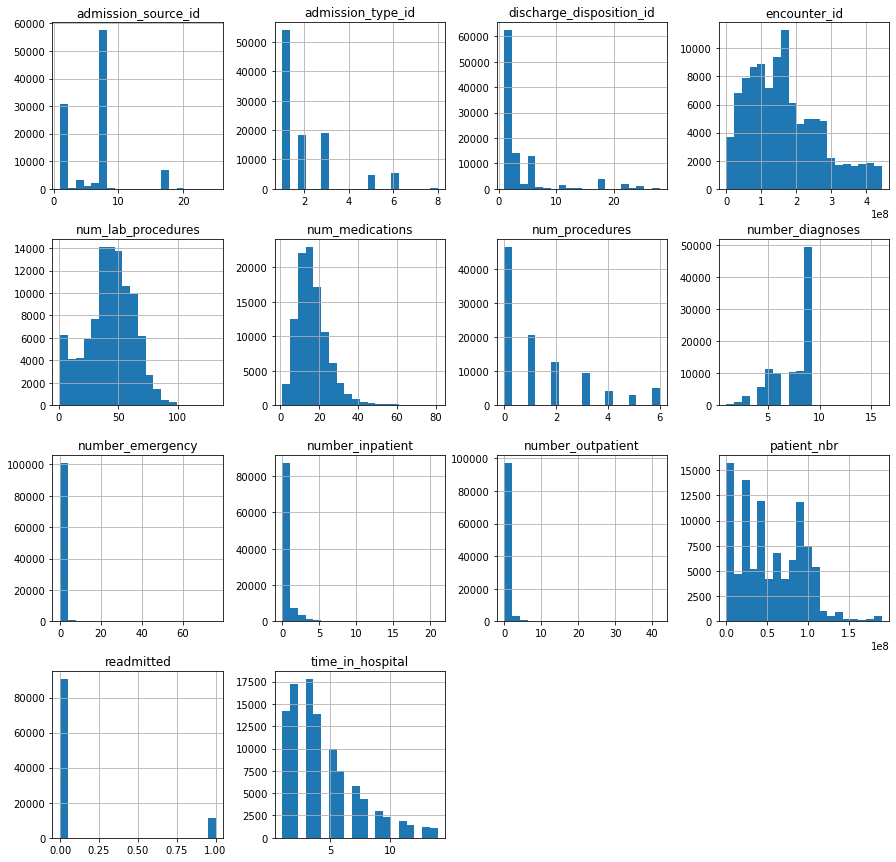

In [468]:
df.hist(bins=20, figsize=(15,15))
plt.show()

In [469]:
for features in df.select_dtypes(include='object'):
    print('Feature Name = {}\nUnique Attributes = {}\nNumber of Unique Attributes = {}\nValue Count of {} = \n{}\n'.format(features,
                                                                                                                 df[features].unique(),
                                                                                                                  df[features].nunique(),
                                                                                                                  features,
                                                                                              df[features].value_counts()))

Feature Name = race
Unique Attributes = ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
Number of Unique Attributes = 5
Value Count of race = 
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Feature Name = gender
Unique Attributes = ['Female' 'Male' 'Unknown/Invalid']
Number of Unique Attributes = 3
Value Count of gender = 
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Feature Name = age
Unique Attributes = ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Number of Unique Attributes = 10
Value Count of age = 
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Feature Name = weight
Unique Attributes = [nan '[75


Feature Name = acetohexamide
Unique Attributes = ['No' 'Steady']
Number of Unique Attributes = 2
Value Count of acetohexamide = 
No        101765
Steady         1
Name: acetohexamide, dtype: int64

Feature Name = glipizide
Unique Attributes = ['No' 'Steady' 'Up' 'Down']
Number of Unique Attributes = 4
Value Count of glipizide = 
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

Feature Name = glyburide
Unique Attributes = ['No' 'Steady' 'Up' 'Down']
Number of Unique Attributes = 4
Value Count of glyburide = 
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

Feature Name = tolbutamide
Unique Attributes = ['No' 'Steady']
Number of Unique Attributes = 2
Value Count of tolbutamide = 
No        101743
Steady        23
Name: tolbutamide, dtype: int64

Feature Name = pioglitazone
Unique Attributes = ['No' 'Steady' 'Up' 'Down']
Number of Unique Attributes = 4
Value Count of pioglitazone = 
No        9443

In [470]:
df.drop(['weight', 'payer_code', 'medical_specialty', 'examide' , 'citoglipton' ,'encounter_id', 'patient_nbr', 
         'admission_type_id', 'admission_source_id', 'discharge_disposition_id'], axis=1, inplace=True)

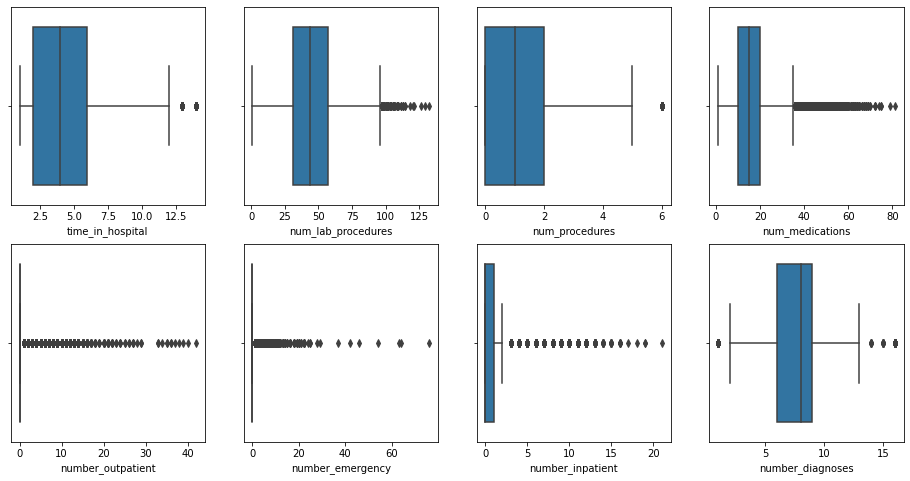

In [471]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]] ,ax=ax[i][j])
            count = count+1

boxplot_for_outlier(df, df.select_dtypes(exclude='object').columns.tolist())

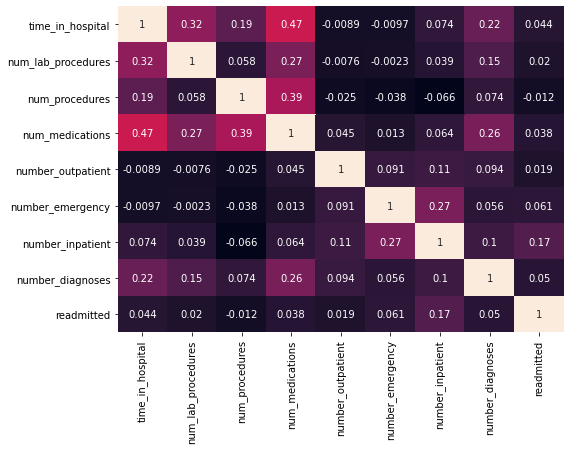

In [472]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cbar=False)

In [473]:
df.gender.replace('Unknown/Invalid', np.nan , inplace=True)
df.dropna(subset=['gender'], how='all', inplace = True)

In [474]:
df['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

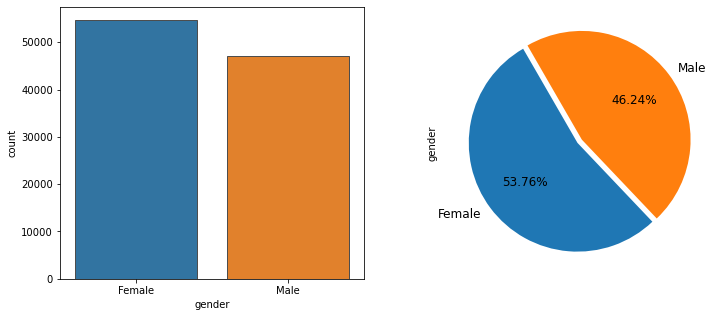

In [475]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
labels = ['Female','Male']
sns.countplot(x=df.gender, data=df, ax=ax[0], edgecolor=".3")
df.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12})
plt.show()

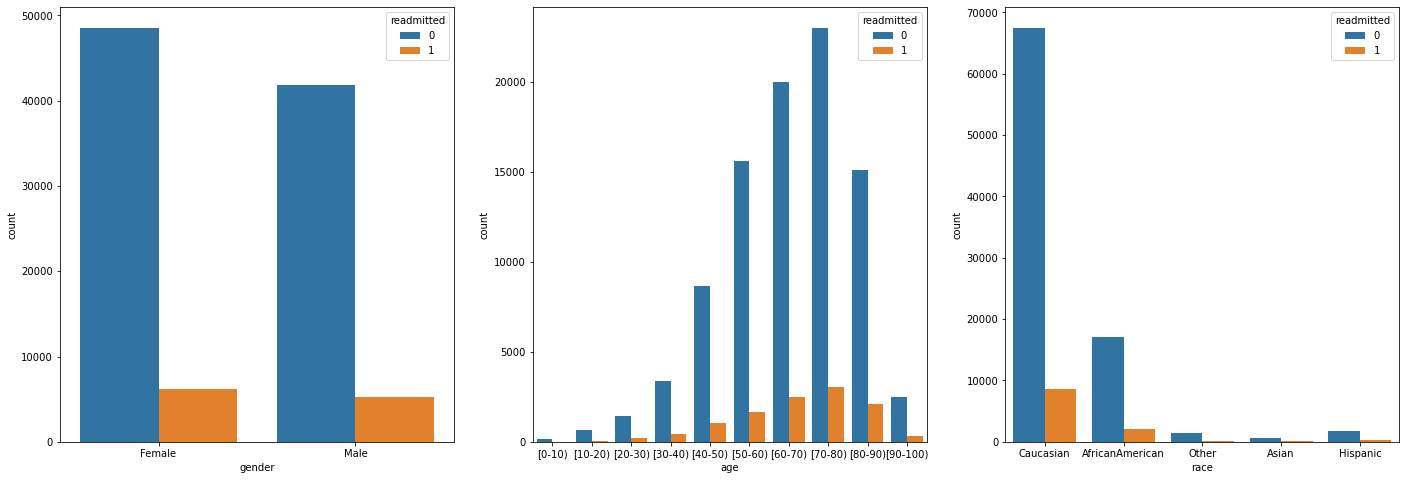

In [476]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
count = 0
for i in ['gender', 'age', 'race']:
    sns.countplot(df[i], hue=df.readmitted, ax=ax[count]);
    count = count + 1

In [477]:
df.groupby(by="insulin").readmitted.mean()

insulin
Down      0.138975
No        0.100380
Steady    0.111284
Up        0.129905
Name: readmitted, dtype: float64

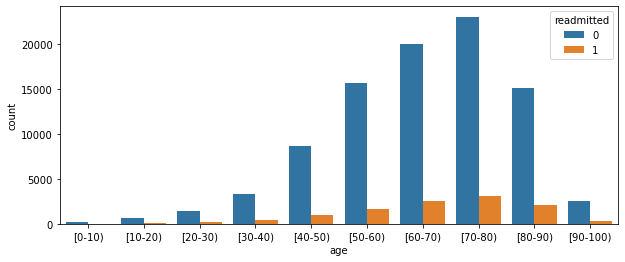

In [478]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='age', hue='readmitted', data=df)
plt.show()

In [479]:
def corr_2_cols(col1, col2):
    res = df.groupby([col1, col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [480]:
corr_2_cols('age', 'readmitted')

readmitted,0,1,perc
age,,,
[0-10),158,3,0.018634
[10-20),651,40,0.057887
[20-30),1421,236,0.142426
[30-40),3351,424,0.112318
[40-50),8658,1027,0.106040
[50-60),15588,1668,0.096662
[60-70),19980,2502,0.111289
[70-80),22997,3069,0.117740
[80-90),15119,2078,0.120835


In [481]:
df['race'].fillna(df['race'].mode()[0], inplace = True)

In [482]:
df['A1Cresult'] = df['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-99])
df['max_glu_serum'] = df['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-99])

In [483]:
diag_col = ['diag_1','diag_2','diag_3']
for col in diag_col:
    df[col].fillna('NaN', inplace=True)

In [484]:
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [485]:
for col in diag_col:
    df[col] = df[col].apply(transformFunc).astype(float)

In [486]:
for col in diag_col:
    df[col] = df[col].apply(transformCategory)

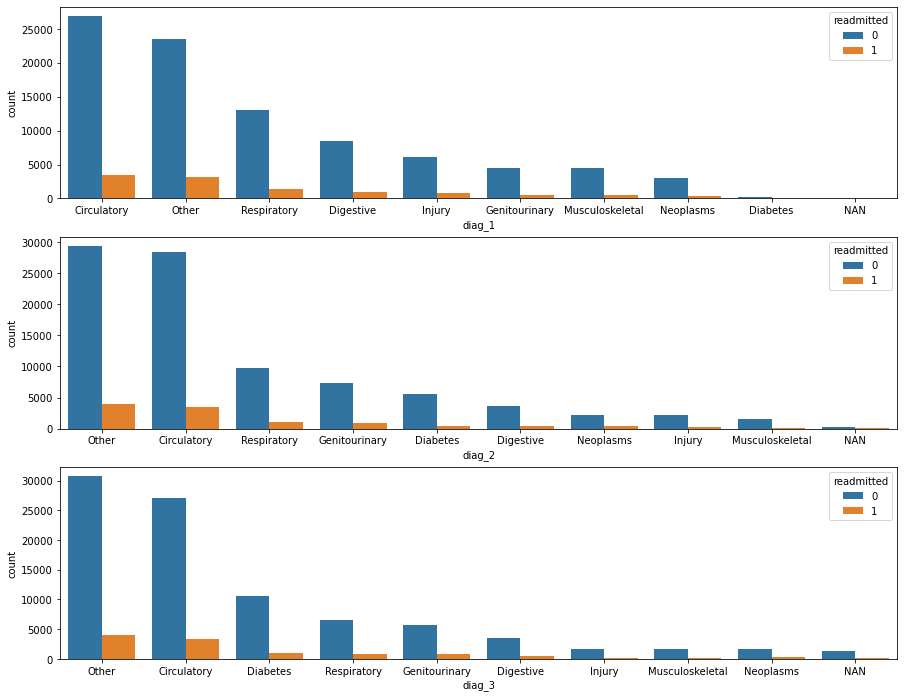

In [487]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_col:
    sns.countplot(df[i], hue=df.readmitted, ax=ax[count], order = df[i].value_counts().index);
    count = count+1

In [488]:
for col in diag_col:
    print(corr_2_cols(col, 'readmitted'))
    print()

readmitted           0     1      perc
diag_1                                
Circulatory      26951  3485  0.114503
Diabetes           219    16  0.068085
Digestive         8460  1015  0.107124
Genitourinary     4562   555  0.108462
Injury            6118   854  0.122490
Musculoskeletal   4486   471  0.095017
NAN                 16     5  0.238095
Neoplasms         3087   346  0.100786
Other            23487  3207  0.120139
Respiratory      13020  1403  0.097275

readmitted           0     1      perc
diag_2                                
Circulatory      28341  3539  0.111010
Diabetes          5625   446  0.073464
Digestive         3691   479  0.114868
Genitourinary     7391   985  0.117598
Injury            2148   278  0.114592
Musculoskeletal   1587   177  0.100340
NAN                329    29  0.081006
Neoplasms         2167   380  0.149195
Other            29378  3898  0.117141
Respiratory       9749  1146  0.105186

readmitted           0     1      perc
diag_3                 

In [489]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=2 , contamination=0.1)
lof.fit_predict(df.select_dtypes(exclude='object'))

array([ 1,  1,  1, ..., -1,  1,  1])

In [490]:
df_scores = lof.negative_outlier_factor_
print(df_scores[0:30])
print()
print(np.sort(df_scores)[0:30])

[-1.30322537 -1.         -1.37377773 -1.10355339 -1.         -1.10355339
 -1.05618622 -1.20710678 -1.20710678 -1.19553853 -1.         -0.9267767
 -1.32981137 -0.97213596 -1.14322501 -1.01352314 -1.73205081 -1.29289322
 -1.05618622 -0.9267767  -1.14528471 -1.         -1.         -1.04004886
 -1.         -1.         -0.95412415 -1.         -1.05051026 -1.        ]

[-2.23606798e+10 -2.23606798e+10 -2.00000000e+10 -2.00000000e+10
 -2.00000000e+10 -1.73205081e+10 -1.73205081e+10 -1.73205081e+10
 -1.73205081e+10 -1.73205081e+10 -1.73205081e+10 -1.73205081e+10
 -1.73205081e+10 -1.73205081e+10 -1.73205081e+10 -1.73205081e+10
 -1.73205081e+10 -1.54056942e+10 -1.41421356e+10 -1.41421356e+10
 -1.41421356e+10 -1.41421356e+10 -1.41421356e+10 -1.41421356e+10
 -1.41421356e+10 -1.41421356e+10 -1.41421356e+10 -1.41421356e+10
 -1.41421356e+10 -1.41421356e+10]


In [491]:
threshold_value = np.sort(df_scores)[2]
outlier_tf = df_scores > threshold_value
outlier_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [492]:
new_df = df[df_scores > threshold_value]
df[df_scores < threshold_value]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2761,Caucasian,Male,[70-80),10,55,5,17,0,0,0,...,No,Steady,No,No,No,No,No,No,Yes,0
96305,Caucasian,Female,[60-70),1,30,0,19,0,2,0,...,No,No,No,No,No,No,No,Ch,Yes,0


In [493]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
         'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
         'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
         'troglitazone', 'tolbutamide', 'acetohexamide']

In [494]:
for features in drugs:
    df[features] = df[features].replace(['No','Steady','Up','Down'],[0,1,1,1]).astype(int)

In [495]:
num_cols = df.select_dtypes(exclude='object').drop('readmitted', 1).columns.tolist()
char_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Features = {}".format(num_cols))
print()
print("Categorical Features = {}".format(char_cols))

Numerical Features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

Categorical Features = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed']


In [496]:
ohe = pd.get_dummies(df[['race', 'change', 'diabetesMed', 'gender']], drop_first=True)
X_ohe = pd.concat([df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 
                       'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
                       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                       'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
                      'age', 'diag_1', 'diag_2', 'diag_3']], ohe], axis=1, join='inner')

In [497]:
X = X_ohe
y = df['readmitted']

In [498]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y, shuffle=True)

In [499]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X_train['age'] = oe.fit_transform(X_train['age'].values.reshape(-1, 1))
X_test['age'] = oe.transform(X_test['age'].values.reshape(-1, 1))

<ipython-input-499-6849f8ca04df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'] = oe.fit_transform(X_train['age'].values.reshape(-1, 1))
<ipython-input-499-6849f8ca04df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age'] = oe.transform(X_test['age'].values.reshape(-1, 1))


In [500]:
from sklearn.preprocessing import LabelEncoder

for col in diag_col:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col]) 

<ipython-input-500-eafa1e8f43cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
<ipython-input-500-eafa1e8f43cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = le.fit_transform(X_test[col])


In [501]:
print('Shape of X_train = {} and X_test = {}'.format(X_train.shape, X_test.shape))

Shape of X_train = (81410, 42) and X_test = (20353, 42)


In [509]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X_smt, y_smt = sm.fit_sample(X_train, y_train)

In [510]:
X_train, y_train = X_smt, y_smt

In [513]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
T
clf_list = [LogisticRegression(solver='liblinear'), RandomForestClassifier(), GradientBoostingClassifier(), 
            XGBClassifier(), LGBMClassifier(),
           CatBoostClassifier(verbose=False)]

df_clf = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Accuracy'])

for clf in clf_list:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    clf_name = str(type(clf)).split('.')[-1][:-2]

    train = round(clf.score(X_train, y_train), 3)
    
    test = round(clf.score(X_test, y_test), 3)
    
    accuracy = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    cv = round(accuracy.mean()*100, 3)

    df_clf = df_clf.append({'Name': clf_name, 'Train Score': train, 'Test Score': test, 'Mean Accuracy': cv},
                  ignore_index=True)

df_clf

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    6.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   48.5s remaining:   32.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   55.7s remaining:   37.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   50.9s remaining:   33.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

,Name,Train Score,Test Score,Mean Accuracy
0,LogisticRegression,0.787,0.729,78.486
1,RandomForestClassifier,1.000,0.859,91.279
2,GradientBoostingClassifier,0.865,0.853,86.395
3,XGBClassifier,0.901,0.864,88.919
4,LGBMClassifier,0.889,0.868,88.512
5,CatBoostClassifier,0.905,0.868,89.255


In [515]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(XGBClassifier(n_jobs=-1), k_features='best', forward=True, floating=False, verbose=2,
          scoring='accuracy', cv=5, n_jobs=-1).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.8min finished

[2021-01-13 12:32:10] Features: 1/42 -- score: 0.8196040883292023[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:  3.7min remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  3.7min finished

[2021-01-13 12:35:54] Features: 2/42 -- score: 0.8270082813690364[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  4.2min remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.2min finished

[2021-01-13 12:40:07] Features: 3/42 -- score: 0.8290338852059425[Parallel(

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  3.9min finished

[2021-01-13 14:28:35] Features: 27/42 -- score: 0.8896155412113835[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.9min finished

[2021-01-13 14:32:31] Features: 28/42 -- score: 0.8896639362730765[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:  2.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  3.9min finished

[2021-01-13 14:36:24] Features: 29/42 -- score: 0.8899542887202883[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  2.7min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.7min remaining:   29.1s
[Parallel(n_jobs=-1)]: Done  13

In [516]:
print(sfs.k_feature_names_)
print()
print(sfs.k_score_)

('time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin', 'age', 'diag_1', 'diag_2', 'diag_3', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'change_No', 'diabetesMed_Yes', 'gender_Male')

0.8899542887202883


In [517]:
selected_features = list(sfs.k_feature_names_)
X_train = X_train[selected_features]
X_test = X_test[selected_features]
print('Shape of New X_train = {} and New X_test = {} after SFS'.format(X_train.shape, X_test.shape))

Shape of New X_train = (144648, 29) and New X_test = (20353, 29) after SFS


In [521]:
lgb_params = {'learning_rate' : [0.01, 0.1, 0.05],
              'n_estimators' : [100, 200, 500],
               'subsample' : [0.1, 0.2],
              'max_depth' : [2, 3, 5, 8]}

rs = RandomizedSearchCV(estimator=LGBMClassifier(), param_distributions=lgb_params ,n_iter=100, cv=5, verbose=3,
                               random_state=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.7min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.05],
                                        'max_depth': [2, 3, 5, 8],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.1, 0.2]},
                   random_state=100, scoring='accuracy', verbose=3)

In [522]:
print(rs.best_params_)
print()
print(rs.best_score_)

{'subsample': 0.1, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1}

0.8938672447605462


In [527]:
lgb = LGBMClassifier(subsample=0.1, n_estimators=500, max_depth=8, learning_rate=0.1)
lgb.fit(X_train, y_train)
y_pred_train = lgb.predict(X_train)
y_pred_test = lgb.predict(X_test)

print('Train Score = {}'.format(lgb.score(X_train, y_train)))
print('Test Score = {}'.format(lgb.score(X_test, y_test)))
print()
print('CV Train Score = {}'.format(np.mean(cross_val_score(lgb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1))))
print('CV Test Score = {}'.format(np.mean(cross_val_score(lgb, X_test, y_test, cv=5, scoring='accuracy', n_jobs=-1))))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train Score = 0.9049347381228914
Test Score = 0.8641477914803715

CV Train Score = 0.8938672447605462
CV Test Score = 0.8859136687434402


In [538]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred_test))
print()
print('Accuracy Score = {}'.format(accuracy_score(y_test, y_pred_test)))
print()
print(classification_report(y_test, y_pred_test))

[[17479   603]
 [ 2162   109]]

Accuracy Score = 0.8641477914803715

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18082
           1       0.15      0.05      0.07      2271

    accuracy                           0.86     20353
   macro avg       0.52      0.51      0.50     20353
weighted avg       0.81      0.86      0.83     20353



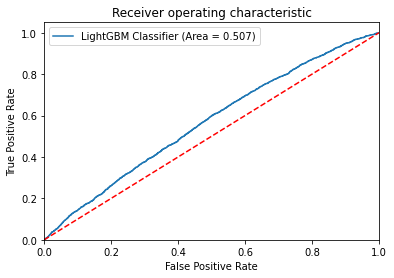

In [537]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, lgb.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='LightGBM Classifier (Area = {})'.format(round(roc_auc, 3)))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()